In [1]:
# To support both python 2 and python 3
# 让这份笔记同步支持 python 2 和 python 3
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
#使用statsmodels便于统计分析数据
import statsmodels.api as sm
import statsmodels.formula.api as smf
#使用sklearn便于预测（机器学习）
from sklearn import linear_model
#使用patsy便于生成模型
import patsy

**7. In this problem, you will use support vector approaches in order to
predict whether a given car gets high or low gas mileage based on the
Auto data set.
(a) Create a binary variable that takes on a 1 for cars with gas
mileage above the median, and a 0 for cars with gas mileage
below the median.**

In [3]:
Auto = pd.read_csv('Data/Auto.csv', na_values='?').dropna()
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [4]:
y = (Auto['mpg'] > Auto['mpg'].median()) * 1

In [5]:
X = Auto[['cylinders','displacement','horsepower','weight','acceleration','year','origin']]

**(b) Fit a support vector classifier to the data with various values
of cost , in order to predict whether a car gets high or low gas
mileage. Report the cross-validation errors associated with dif-
ferent values of this parameter. Comment on your results.**

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
np.random.seed(1)
param_range = 10 ** np.linspace(-5,5,11)
svm = SVC(kernel="linear")
param_grid = [
{'C': param_range },
]
grid_search = GridSearchCV(svm , param_grid, cv = 10, scoring='accuracy',return_train_score=True)
grid_search.fit(X ,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [7]:
cvres_linear = grid_search.cv_results_
for mean_score, params in zip(cvres_linear["mean_test_score"], cvres_linear["params"]):
    print(1 - mean_score, params)

0.11993589743589739 {'C': 1e-05}
0.10230769230769232 {'C': 0.0001}
0.09461538461538466 {'C': 0.001}
0.09679487179487167 {'C': 0.01}
0.09923076923076923 {'C': 0.1}
0.10942307692307673 {'C': 1.0}
0.1068589743589744 {'C': 10.0}
0.1069230769230769 {'C': 100.0}
0.1068589743589744 {'C': 1000.0}
0.10435897435897434 {'C': 10000.0}
0.10942307692307696 {'C': 100000.0}


In [8]:
grid_search.best_estimator_

SVC(C=0.001, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

C = 0.001时误差最小

**(c) Now repeat (b), this time using SVMs with radial and polyno-
mial basis kernels, with different values of gamma and degree and
cost . Comment on your results.**

In [9]:
svm = SVC(kernel="rbf")
param_grid = [
{'C': 10 ** np.linspace(-5,5,11),
 'gamma':10 ** np.linspace(-5,-4,10)},
]
grid_search = GridSearchCV(svm , param_grid, cv = 10, scoring='accuracy',return_train_score=True)
grid_search.fit(X ,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05]),
                          'gamma': array([1.00000000e-05, 1.29154967e-05, 1.66810054e-05, 2.15443469e-05,
       2.78255940e-05, 3.59381366e-05, 4.64158883e-05, 5.99484250e-05,
       7.74263683e-05, 1.00000000e-04])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [10]:
cvres_rbf = grid_search.cv_results_
for mean_score, params in zip(cvres_rbf["mean_test_score"], cvres_rbf["params"]):
    print(1 - mean_score, params)

0.43025641025641026 {'C': 1e-05, 'gamma': 1e-05}
0.4327564102564103 {'C': 1e-05, 'gamma': 1.2915496650148827e-05}
0.4327564102564103 {'C': 1e-05, 'gamma': 1.6681005372000593e-05}
0.4327564102564103 {'C': 1e-05, 'gamma': 2.1544346900318823e-05}
0.4327564102564103 {'C': 1e-05, 'gamma': 2.782559402207126e-05}
0.4327564102564103 {'C': 1e-05, 'gamma': 3.5938136638046256e-05}
0.43025641025641026 {'C': 1e-05, 'gamma': 4.641588833612782e-05}
0.43025641025641026 {'C': 1e-05, 'gamma': 5.994842503189409e-05}
0.43025641025641026 {'C': 1e-05, 'gamma': 7.742636826811278e-05}
0.4377564102564102 {'C': 1e-05, 'gamma': 0.0001}
0.43025641025641026 {'C': 0.0001, 'gamma': 1e-05}
0.4327564102564103 {'C': 0.0001, 'gamma': 1.2915496650148827e-05}
0.4327564102564103 {'C': 0.0001, 'gamma': 1.6681005372000593e-05}
0.4327564102564103 {'C': 0.0001, 'gamma': 2.1544346900318823e-05}
0.4327564102564103 {'C': 0.0001, 'gamma': 2.782559402207126e-05}
0.4327564102564103 {'C': 0.0001, 'gamma': 3.5938136638046256e-05}
0.43

In [11]:
grid_search.best_params_

{'C': 100.0, 'gamma': 3.5938136638046256e-05}

C = 100,gamma =  1.6681005372000593e-05时误差最小

In [12]:
svm = SVC(kernel="poly",gamma = 'auto')
#这里C太大或太小会运行太慢
param_grid = [
{'C': 10 ** np.linspace(-6,-4,3),
 'degree':[2,]},
{'C': 10 ** np.linspace(-8,-6,3),
 'degree':[3,]},
]
grid_search = GridSearchCV(svm , param_grid, cv = 10, scoring='accuracy',return_train_score=True)
grid_search.fit(X ,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': array([1.e-06, 1.e-05, 1.e-04]), 'degree': [2]},
                         {'C': array([1.e-08, 1.e-07, 1.e-06]), 'degree': [3]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [13]:
cvres_poly = grid_search.cv_results_
for mean_score, params in zip(cvres_poly["mean_test_score"], cvres_poly["params"]):
    print(1 - mean_score, params)

0.09673076923076918 {'C': 1e-06, 'degree': 2}
0.10923076923076924 {'C': 1e-05, 'degree': 2}
0.12205128205128202 {'C': 0.0001, 'degree': 2}
0.12955128205128208 {'C': 1e-08, 'degree': 3}
0.12698717948717952 {'C': 1e-07, 'degree': 3}
0.11942307692307685 {'C': 1e-06, 'degree': 3}


In [14]:
grid_search.best_params_

{'C': 1e-06, 'degree': 2}

对多项式，C = 1e-06,degree = 2时误差最小

**(d) Make some plots to back up your assertions in (b) and (c).**

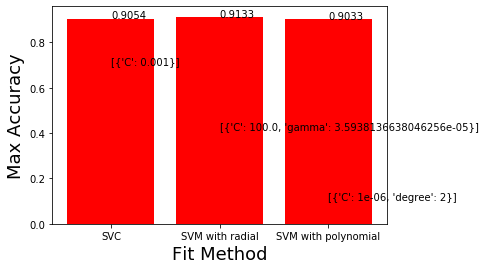

In [15]:
method_list = ['SVC','SVM with radial','SVM with polynomial']
method_tuple = cvres_linear,cvres_rbf,cvres_poly
max_accuracy_list = [method["mean_test_score"].max() for method in method_tuple]
max_accuracy_param_list = [np.array( method["params"])
                           [method["mean_test_score"] ==  method["mean_test_score"].max()] for method in method_tuple]
plt.bar(method_list,max_accuracy_list,color = 'red')
for num in range(len(max_accuracy_list)):
    plt.text(num,max_accuracy_list[num],max_accuracy_list[num].round(4))
    plt.text(num,max_accuracy_list[num] - num * 0.3 - 0.2,max_accuracy_param_list[num])
plt.xlabel("Fit Method", fontsize=18)
plt.ylabel("Max Accuracy", fontsize=18)
plt.show()